## Tensorflow Classfication
- Binary Classfication            Activator - Sigmoid Function
- Multiclass Classification       Activator - Softmax Function
- Multilabel Classification (Multiple lable per sample)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

### Input Data Preparation & Visulization

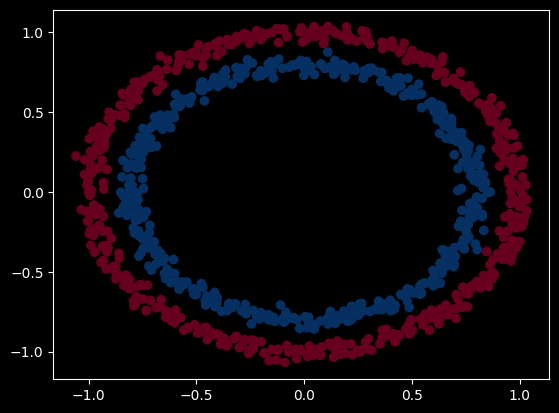

In [4]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples,noise=0.03,random_state=42)
df_input = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
plt.style.use('dark_background')
plt.scatter(df_input.X0, df_input.X1,c=y,cmap=plt.cm.RdBu)    

### Creating and compiling a Model

In [41]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

### Fitting a model

In [42]:
model_1.fit(X,y,epochs=100,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 0.6936


[0.6970613598823547, 0.4869999885559082]

### Improving a model

In [43]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [44]:
history = model_2.fit(X,y,epochs=100,verbose=0)
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0027      


[0.0024353060871362686, 1.0]

### Visualize Prediction

In [45]:
def visualize_prediction(model,X,y):
    x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    
    # zip xx and yy together
    x_in = np.c_[xx.ravel(),yy.ravel()]
    
    # Make Predictions
    y_pred = model.predict(x_in)
   
    
    # Check for multiclass
    if len(y_pred[0]) > 1:
        # Reshape the prediction for plotting
        y_pred = np.argmax(y_pred,axis = 1).reshape(xx.reshape)
    else:
        print('Rounded')
        y_pred = np.round(y_pred).reshape(xx.shape)   
            
    # Plot Desicion 
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Rounded


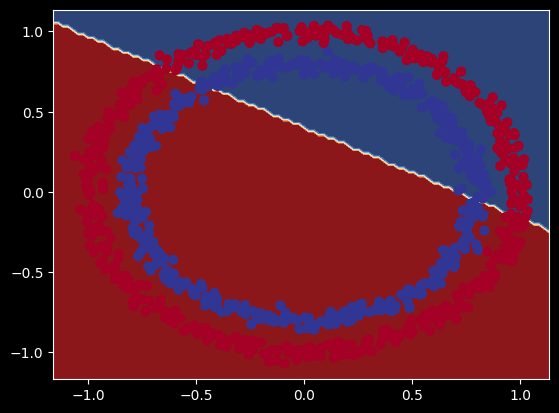

In [46]:
visualize_prediction(model_1,X,y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Rounded


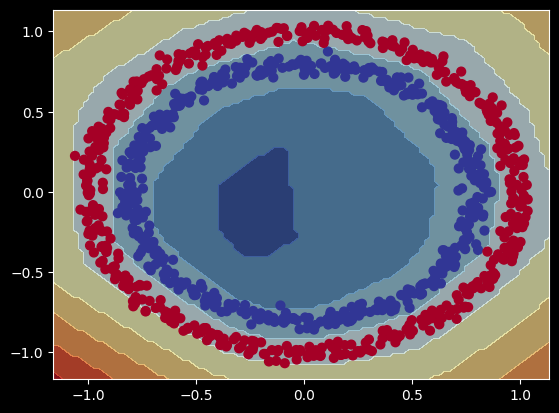

In [47]:
visualize_prediction(model_2,X,y)

In [48]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))
    
# zip xx and yy together
x_in = np.c_[xx.ravel(),yy.ravel()]

# Make Predictions
y_pred = model_1.predict(x_in)
y_pred = np.round(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [12]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [13]:
history = model_3.fit(X,y,epochs=100,verbose=0)
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0015   


[0.0022533840965479612, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Rounded


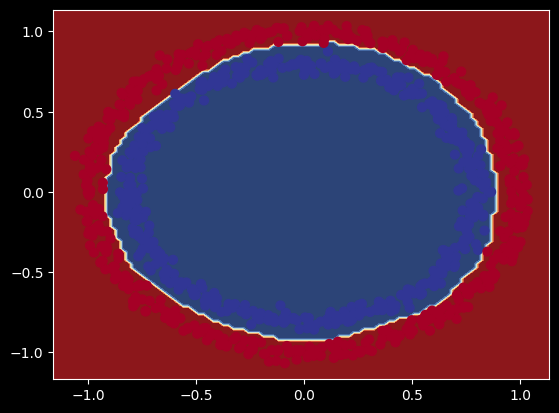

In [49]:
visualize_prediction(model_3,X,y)

### Activation Functions

Text(0.5, 1.0, 'Relu')

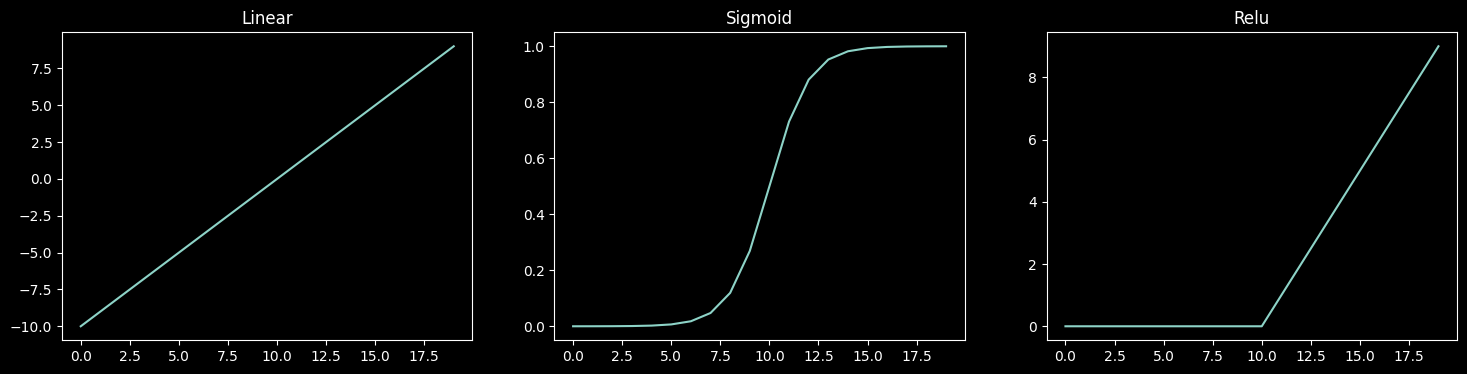

In [15]:
tn_linear = tf.cast(tf.range(-10,10),dtype=tf.float32)
tn_sigmoid  = tf.keras.activations.sigmoid(tn_linear)      # Sigmoid Function
tn_relu = tf.keras.activations.relu(tn_linear)             # Relu Function


plt.style.use('dark_background')
fig,plots = plt.subplots(1,3)
fig.set_size_inches(18,4)
plots[0].plot(tn_linear)
plots[0].set_title('Linear')

plots[1].plot(tn_sigmoid)
plots[1].set_title('Sigmoid')

plots[2].plot(tn_relu)
plots[2].set_title('Relu')


### Finding the best Learning Rate

In [26]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda ep: 1e-4 * ep)

In [27]:
history = model_4.fit(X,y,epochs=100,callbacks=[lr_schedular])

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5004 - loss: 0.6947 - learning_rate: 0.0000e+00
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5020 - loss: 0.6943 - learning_rate: 1.0000e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5155 - loss: 0.6928 - learning_rate: 2.0000e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4982 - loss: 0.6910 - learning_rate: 3.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4933 - loss: 0.6893 - learning_rate: 4.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6877 - learning_rate: 5.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6855 - learning_rate: 6.0000e-04
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6826 - learning_rate: 7.0000e-04
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 0.6787 - learning_

In [31]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0038    


[0.004729778505861759, 0.9980000257492065]

<Axes: >

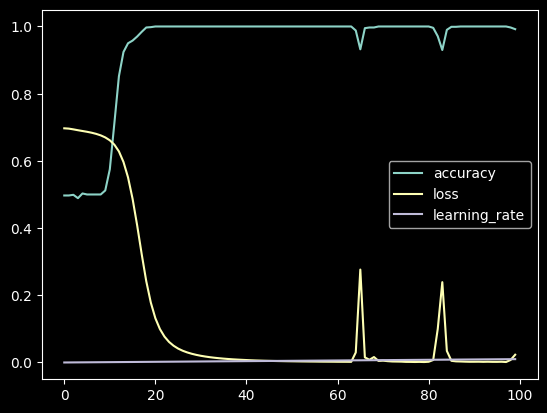

In [28]:
df_hist = pd.DataFrame(history.history)
df_hist.plot()

Text(0.5, 1.0, 'Learning Rate vs Loss')

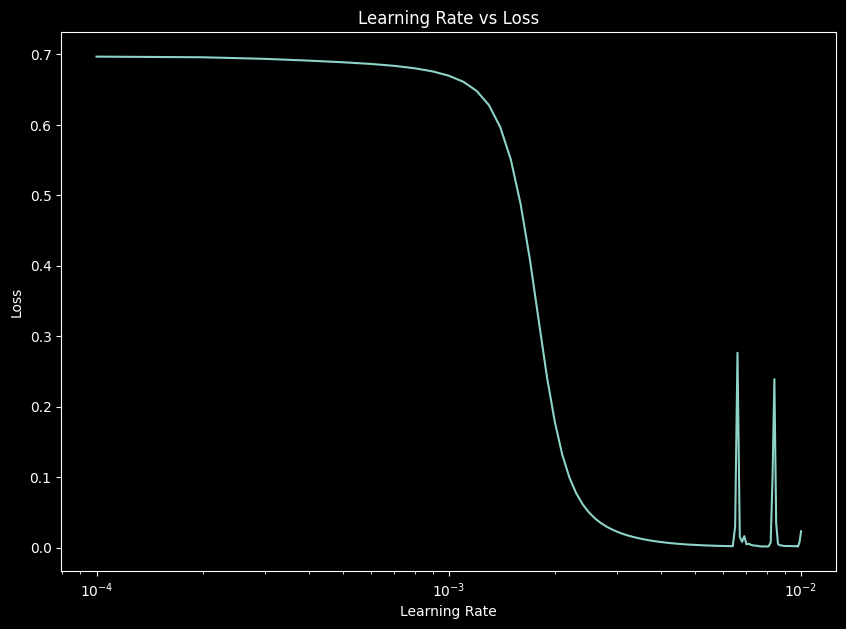

In [39]:
lrs = 1e-4 * np.arange(1,101)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

# Make Predictions
y_pred = model_3.predict(X)
y_pred = np.round(y_pred)

confusion_matrix(y,y_pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


array([[500,   0],
       [  0, 500]], dtype=int64)

In [80]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)
actual,predicted
confusion_matrix(actual,predicted)

array([[ 11, 101],
       [ 97, 791]], dtype=int64)